## Figures 4 presentation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('ggplot')
import pandas as pd
from scipy.special import logit,expit
import seaborn as sns
import os

<ipython-input-4-5df35b6dd40d>:7: RuntimeWarning: divide by zero encountered in double_scalars
  odds_array = np.array([p/(1-p) for p in prob_array])


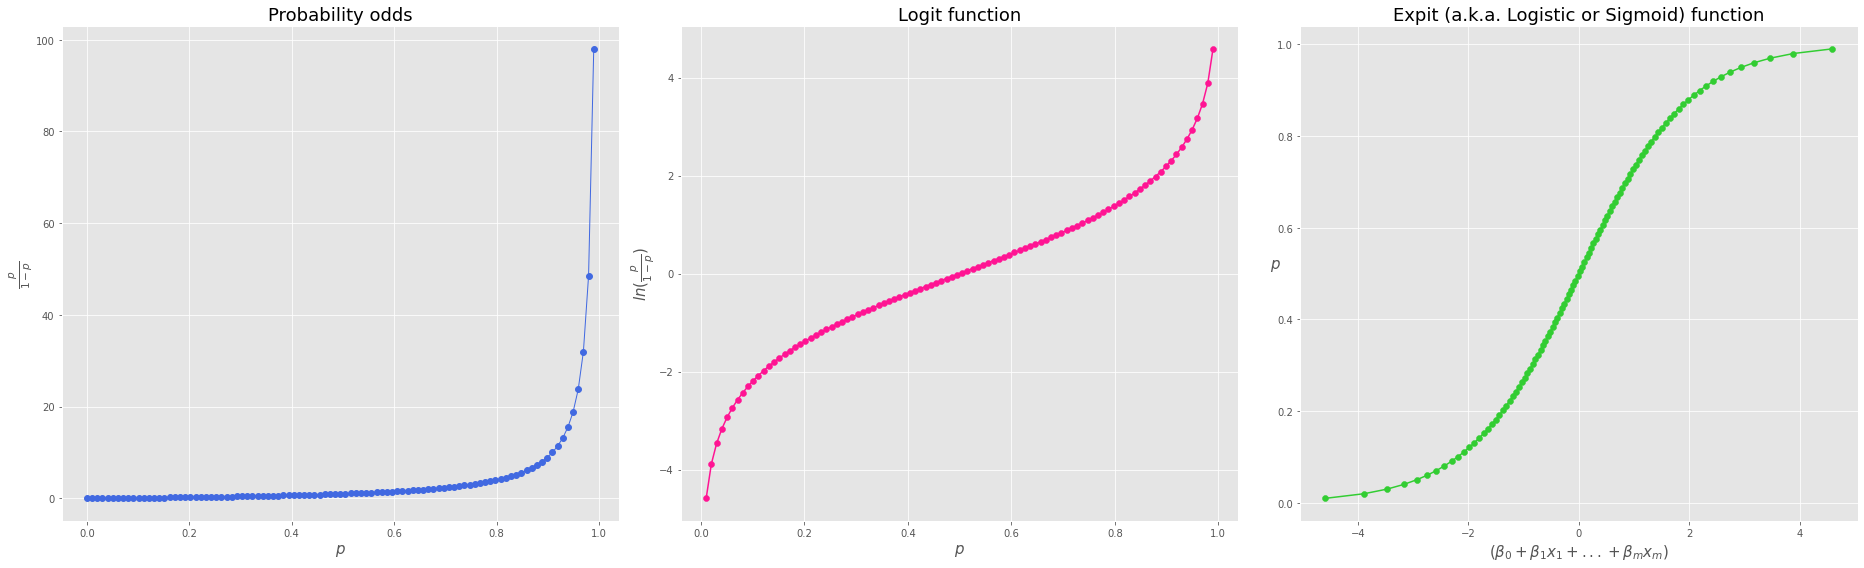

In [4]:
# initialize figure
fig = plt.figure(figsize=(26,8))
gs = gridspec.GridSpec(1,3)
ax = {}

prob_array = np.linspace(0,1,100)
odds_array = np.array([p/(1-p) for p in prob_array])

ax[0] = fig.add_subplot(gs[0,0])
ax[0].plot(prob_array,odds_array,color='royalblue',lw=1)
ax[0].scatter(prob_array,odds_array,s=35,color='royalblue',lw=1)
ax[0].set_title('Probability odds',fontsize=18)
ax[0].set_xlabel('$p$',fontsize=15)
ax[0].set_ylabel(r'$\frac{p}{1-p}$',fontsize=15,labelpad=1.1)

ax[1] = fig.add_subplot(gs[0,1])
ax[1].plot(prob_array,logit(prob_array),color='deeppink')
ax[1].scatter(prob_array,logit(prob_array),color='deeppink')
ax[1].set_title('Logit function',fontsize=18)
ax[1].set_xlabel('$p$',fontsize=15)
ax[1].set_ylabel(r'$ln (\frac{p}{1-p})$',fontsize=15,labelpad=1.8)

ax[2] = fig.add_subplot(gs[0,2])
ax[2].plot(logit(prob_array),expit(logit(prob_array)),color='limegreen')
ax[2].scatter(logit(prob_array),expit(logit(prob_array)),color='limegreen')
ax[2].set_title('Expit (a.k.a. Logistic or Sigmoid) function',fontsize=18)
ax[2].set_xlabel(r'$(\beta_0 + \beta_1 x_1 + ... + \beta_m x_m)$',fontsize=15)
ax[2].set_ylabel('$p$',rotation=0,fontsize=15,labelpad=1.5)

fig.tight_layout()
plt.savefig('Logistic_regression1.png',dpi=300,format='png')
plt.show()

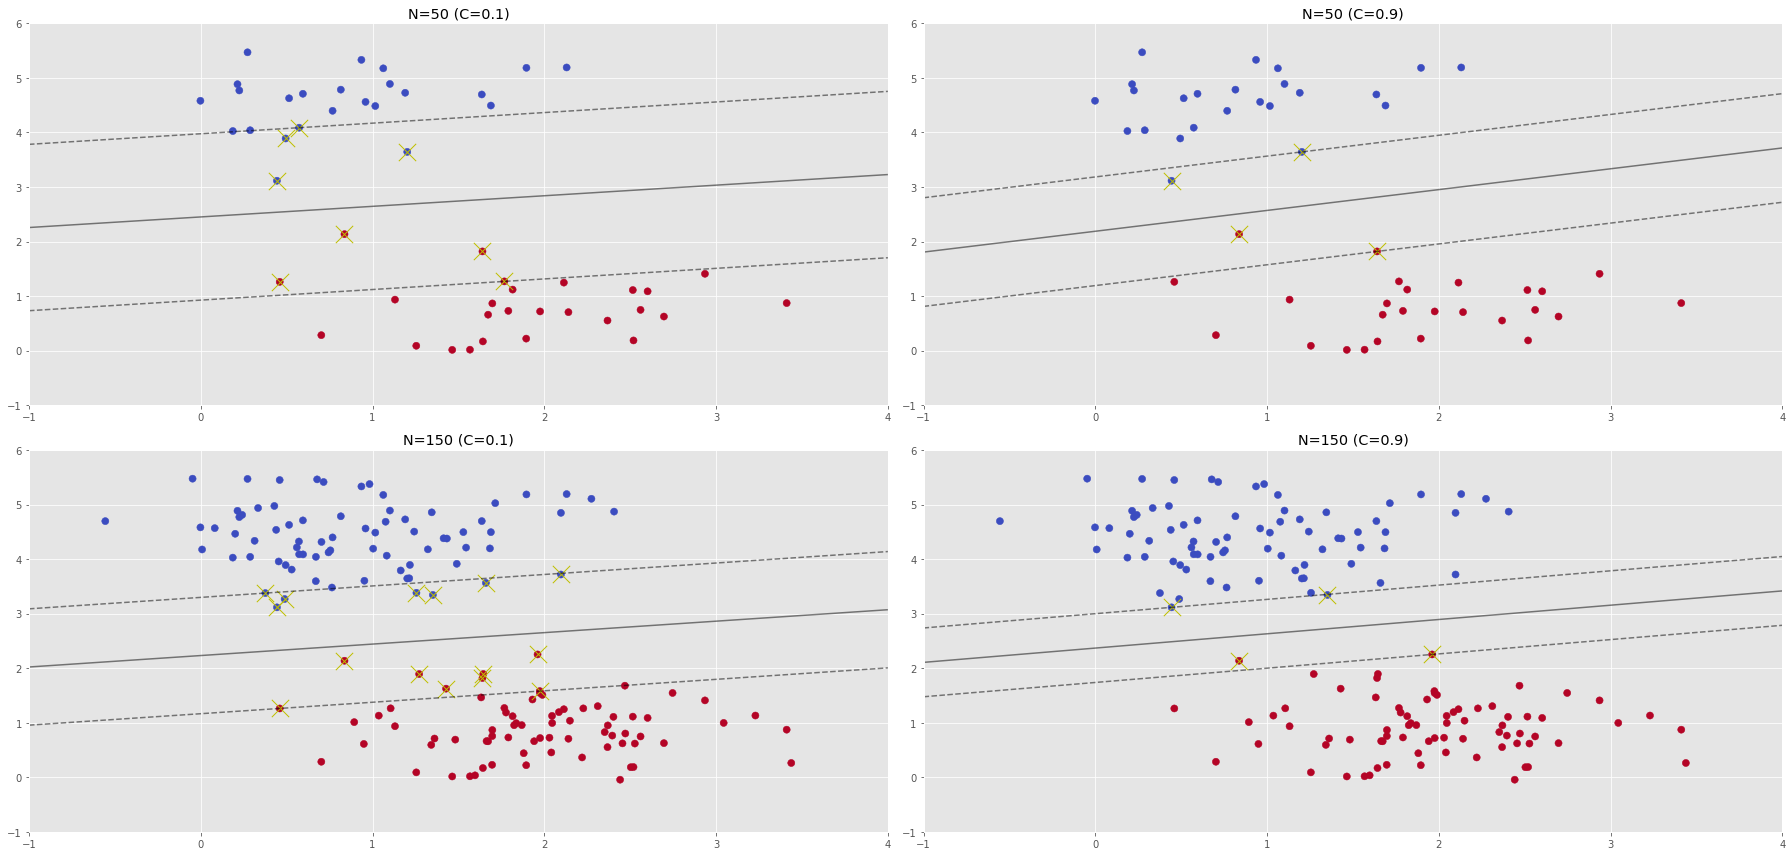

In [29]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs


N=[50,150]
C = [0.1,0.9]
fig = plt.figure(figsize=(25,12))
gs = gridspec.GridSpec(2,2)
ax={}

for n in range(len(N)):
    for c in range(len(C)):
        X, y = make_blobs(n_samples=200, centers=2,
                            random_state=0, cluster_std=0.60)
        X = X[:N[n]]
        y = y[:N[n]]
        model = SVC(kernel='linear', C=C[c])
        model.fit(X, y)
        
        ax[0] = fig.add_subplot(gs[n,c])
        ax[0].set_xlim(-1, 4)
        ax[0].set_ylim(-1, 6)
        xlim = ax[0].get_xlim()
        ylim = ax[0].get_ylim()
        ax[0].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
        # create grid to evaluate model
        x = np.linspace(xlim[0], xlim[1], 30)
        y = np.linspace(ylim[0], ylim[1], 30)
        Y, X = np.meshgrid(y, x)
        xy = np.vstack([X.ravel(), Y.ravel()]).T
        P = model.decision_function(xy).reshape(X.shape)
        
        # plot decision boundary and margins
        ax[0].contour(X, Y, P, colors='k',
                levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

        #ax[0] = plot_svc_decision_function(X,y,model,model.support_vectors_, ax[0])
        ax[0].scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],s=300,color='y',marker='x',linewidth=1)
        ax[0].set_title(f'N={N[n]} (C={C[c]})')

fig.tight_layout()
plt.savefig('svm1.png',dpi=300,format='png')
plt.show()

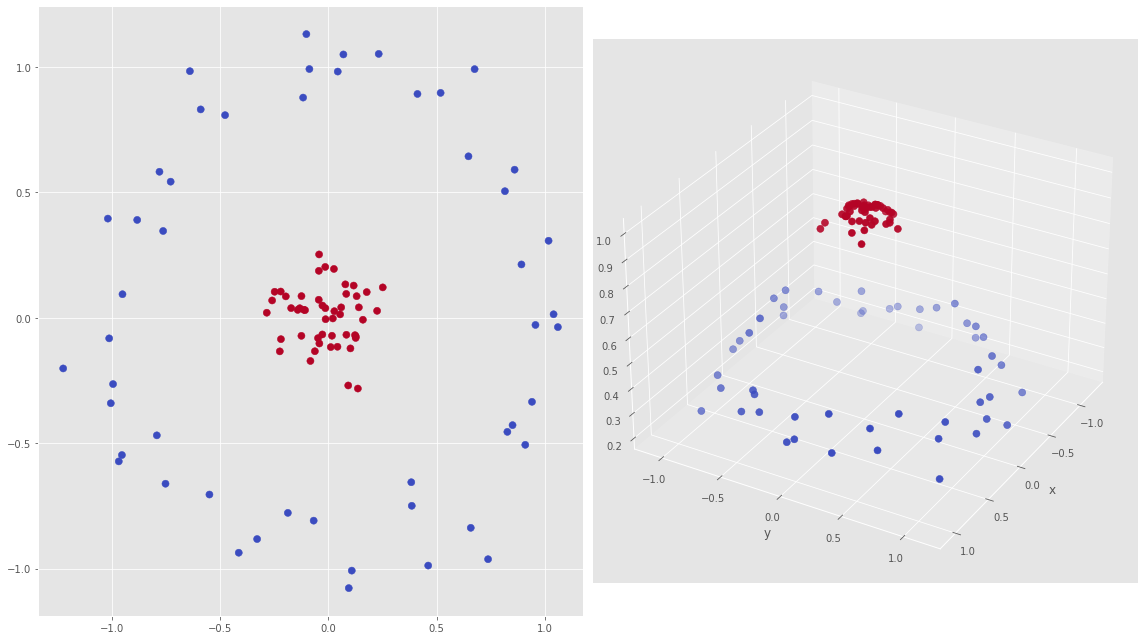

In [26]:
from sklearn.datasets import make_circles


X, y = make_circles(100, factor=.1, noise=.1)
r = np.exp(-(X ** 2).sum(1))

fig = plt.figure(figsize=(16,9))
gs = gridspec.GridSpec(1,2)
ax={}

clf = SVC(kernel='linear').fit(X, y)
ax[0]=fig.add_subplot(gs[0,0])
ax[0].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
ax[1] = fig.add_subplot(gs[0,1],projection='3d')
ax[1].scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='coolwarm')
ax[1].view_init(elev=30, azim=30)
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')

fig.tight_layout()
plt.savefig('svm2.png',dpi=300,format='png')
plt.show()
plt.show()

